In [17]:
#pip install yfinance

[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-07-01  136.039993  139.039993  135.660004  138.929993  137.216934   
2022-07-05  137.770004  141.610001  136.929993  141.559998  139.814529   
2022-07-06  141.350006  144.119995  141.080002  142.919998  141.157730   
2022-07-07  143.289993  146.550003  143.279999  146.350006  144.545471   
2022-07-08  145.259995  147.550003  145.000000  147.039993  145.226944   

              Volume  
Date                  
2022-07-01  71051600  
2022-07-05  73353800  
2022-07-06  74064300  
2022-07-07  66253700  
2022-07-08  64547800  


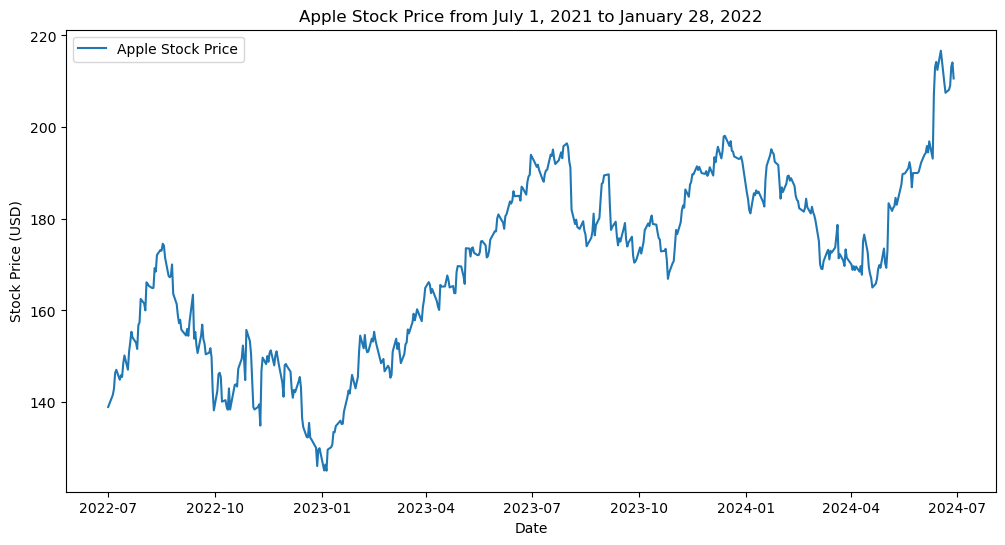

In [29]:
# Install yfinance if not already installed
# !pip install yfinance

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the date range
start_date = '2022-07-01'
end_date = '2024-07-01'

# Fetch Apple's stock data
apple_data = yf.download('AAPL', start=start_date, end=end_date)

# Display first few rows
print(apple_data.head())

# Plot the closing price
plt.figure(figsize=(12,6))
plt.plot(apple_data['Close'], label='Apple Stock Price')
plt.title('Apple Stock Price from July 1, 2021 to January 28, 2022')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()


In [30]:
apple_data=apple_data[["Open","High","Low","Close"]]

In [31]:
apple_data

,Open,High,Low,Close
Date,,,,
2022-07-01,136.039993,139.039993,135.660004,138.929993
2022-07-05,137.770004,141.610001,136.929993,141.559998
2022-07-06,141.350006,144.119995,141.080002,142.919998
2022-07-07,143.289993,146.550003,143.279999,146.350006
2022-07-08,145.259995,147.550003,145.000000,147.039993
...,...,...,...,...
2024-06-24,207.720001,212.699997,206.589996,208.139999
2024-06-25,209.149994,211.380005,208.610001,209.070007
2024-06-26,211.500000,214.860001,210.639999,213.250000


In [32]:
column="Close"

In [33]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(apple_data[[column]])
print("Len:",data1.shape)

Len: (501, 1)


In [34]:
len(data1)

501

In [35]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

401
X_train length: (401, 1)
X_test length: (100, 1)
y_train length: (401, 1)
y_test length: (100, 1)


In [36]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
lags=[1,2,3,4]
from statsmodels.tsa.ar_model import AutoReg
for i in lags:
    #print(i)
   
    for td in trends:
        
        #print(td)
        #trendslist.append(td)
        model = AutoReg(X_train, lags=i,trend=td)
        model_fit = model.fit()
        # make prediction
        y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
        #mse=mean_squared_error(y_test,y_pred,squared=False)
        from stockFunctions import rmsemape
        print("Lag={},Trend={}".format(i,td))
        rmsemape(y_test,y_pred)
        print("************")

Lag=1,Trend=n
RMSE-Testset: 0.15896272170498899
maPe-Testset: 0.23246477286871997
************
Lag=1,Trend=t
RMSE-Testset: 0.2384047398024779
maPe-Testset: 0.3774227328708149
************
Lag=1,Trend=c
RMSE-Testset: 0.16198641656637952
maPe-Testset: 0.21170431891688246
************
Lag=1,Trend=ct
RMSE-Testset: 0.18300397934688897
maPe-Testset: 0.28926797026473217
************
Lag=2,Trend=n
RMSE-Testset: 0.15866723931532775
maPe-Testset: 0.23064042037564128
************
Lag=2,Trend=t
RMSE-Testset: 0.24292988118606373
maPe-Testset: 0.38491732798300377
************
Lag=2,Trend=c
RMSE-Testset: 0.16273319164989603
maPe-Testset: 0.21150055612678226
************
Lag=2,Trend=ct
RMSE-Testset: 0.18718909719487825
maPe-Testset: 0.2967226145454946
************
Lag=3,Trend=n
RMSE-Testset: 0.15895826618368572
maPe-Testset: 0.23234053085784648
************
Lag=3,Trend=t
RMSE-Testset: 0.24060938464084028
maPe-Testset: 0.3810870445663803
************
Lag=3,Trend=c
RMSE-Testset: 0.16159644359021202
maPe

In [37]:
len(y_pred)

100

In [38]:
i=1
td='ct'
model = AutoReg(X_train, lags=i,trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Lag={},Trend={}".format(i,td))
rmsemape(y_test,y_pred)
print("************")

Lag=1,Trend=ct
RMSE-Testset: 0.18300397934688897
maPe-Testset: 0.28926797026473217
************


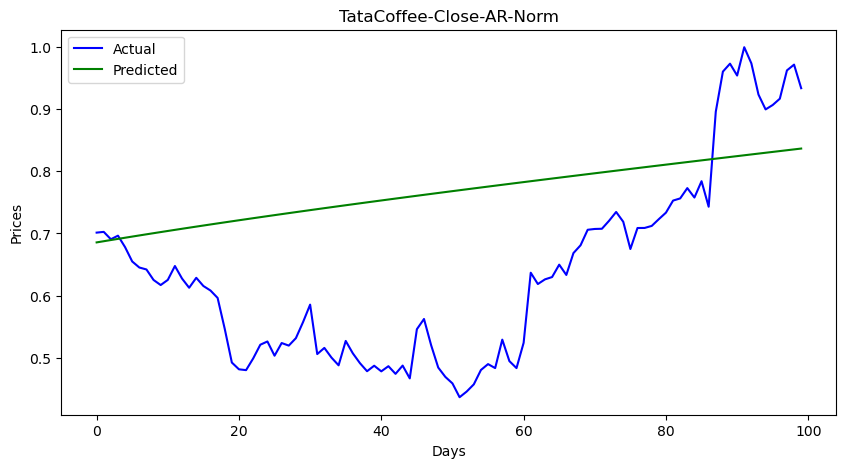

In [39]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close-AR-Norm","Days","Prices")

In [40]:
len(data1)

501

In [41]:
y_test

array([[0.70136394],
       [0.70256417],
       [0.69067114],
       [0.69645399],
       [0.67790503],
       [0.65488266],
       [0.64517181],
       [0.64200767],
       [0.62509547],
       [0.61691217],
       [0.62520469],
       [0.64757226],
       [0.62738687],
       [0.6125478 ],
       [0.6285871 ],
       [0.61538462],
       [0.60807422],
       [0.59618119],
       [0.54642672],
       [0.49208945],
       [0.48117837],
       [0.4798691 ],
       [0.49874521],
       [0.52078563],
       [0.52602289],
       [0.50310974],
       [0.52351339],
       [0.51936713],
       [0.53136938],
       [0.55711952],
       [0.58537917],
       [0.50572829],
       [0.51565741],
       [0.50005465],
       [0.48761603],
       [0.5268958 ],
       [0.50692851],
       [0.49110749],
       [0.47812328],
       [0.48696123],
       [0.47790518],
       [0.48619754],
       [0.47386797],
       [0.4871795 ],
       [0.46655757],
       [0.54577191],
       [0.56224774],
       [0.520

In [42]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])

In [43]:
aTestNormTable

,Close
0,0.701364
1,0.702564
2,0.690671
3,0.696454
4,0.677905
...,...
95,0.906929
96,0.917076
97,0.962684
98,0.971959


In [44]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)

actual_stock_price_test_ori

array([[189.30000305],
       [189.41000366],
       [188.32000732],
       [188.8500061 ],
       [187.1499939 ],
       [185.03999329],
       [184.1499939 ],
       [183.86000061],
       [182.30999756],
       [181.55999756],
       [182.32000732],
       [184.36999512],
       [182.52000427],
       [181.16000366],
       [182.63000488],
       [181.41999817],
       [180.75      ],
       [179.66000366],
       [175.1000061 ],
       [170.11999512],
       [169.11999512],
       [169.        ],
       [170.72999573],
       [172.75      ],
       [173.22999573],
       [171.13000488],
       [173.        ],
       [172.61999512],
       [173.72000122],
       [176.08000183],
       [178.66999817],
       [171.36999512],
       [172.27999878],
       [170.8500061 ],
       [169.71000671],
       [173.30999756],
       [171.47999573],
       [170.02999878],
       [168.83999634],
       [169.6499939 ],
       [168.82000732],
       [169.58000183],
       [168.44999695],
       [169

In [45]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

actual_stock_price_test_oriA

,Close
0,189.300003
1,189.410004
2,188.320007
3,188.850006
4,187.149994
...,...
95,208.139999
96,209.070007
97,213.25
98,214.100006


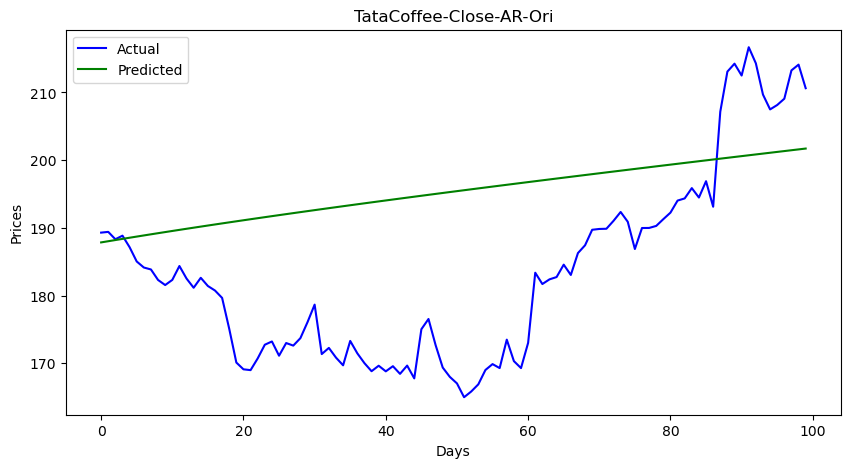

In [46]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-Close-AR-Ori","Days","Prices")

In [48]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

forecast=model_fit.predict(len(data1), len(data1)+3)

forecast


RMSE-Testset: 16.772314986384284
maPe-Testset: 0.082516349637172


array([0.83811736, 0.83946286, 0.84080704, 0.84214993])

In [49]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [50]:
forecast_stock_price_test_oriF

,Closefore
0,201.833454
1,201.956769
2,202.079963
3,202.203039


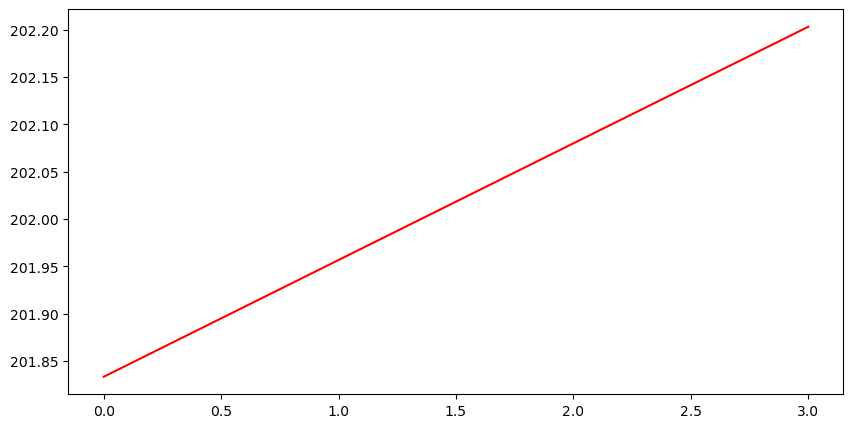

In [51]:
forecast_stock_price_test_oriF.to_csv("CloseAR.csv",index=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[116:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")